# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Obervation 1: With Lat vs Temperature, we can see that as the latitude increases beyond 20 or decreases belowe -20 then the temperature will also decrease. It also makes sense to note that the highest temperature lies around the equator
#Observation 2: Although cloudiness is very random/scattered, we can see that in the northern hemisphere there is a higher percentage of clouds ranging 50% and above noting that there are more instances of cloudiness at 100%
#Observation 3: From the linear regression data for windspeed, the windspeed gradually increases the further north we go within the northern hemisphere whereas for the southern hemisphere the further north or closer to the equator we go, the wind decreases. 
                # But the wind speed increase/decrease is minimal. 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
lat_lngs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")
city_counter = 0
city_stat = []
for locations in cities:
    city_counter += 1
    city_url = url + "&q=" + locations 
    print("Processing record set", city_counter, "of", len(cities), "with the city named", locations,)
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_stat.append({"City":locations, "Latitude": city_lat, "Longitude": city_lng, 
                          "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Clouds": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
    except:
        print("Error, city not found")
        pass


Beginning Data Retrieval
-----------------------------
Processing record set 1 of 624 with the city named vaini
Processing record set 2 of 624 with the city named hay river
Processing record set 3 of 624 with the city named belushya guba
Error, city not found
Processing record set 4 of 624 with the city named ushuaia
Processing record set 5 of 624 with the city named zolotukhino
Processing record set 6 of 624 with the city named yar-sale
Processing record set 7 of 624 with the city named mataura
Processing record set 8 of 624 with the city named argalasti
Processing record set 9 of 624 with the city named ribeira grande
Processing record set 10 of 624 with the city named boralday
Processing record set 11 of 624 with the city named punta arenas
Processing record set 12 of 624 with the city named grand river south east
Error, city not found
Processing record set 13 of 624 with the city named kurilsk
Processing record set 14 of 624 with the city named salalah
Processing record set 15 of 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_stat
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd


,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,vaini,-21.2000,-175.2000,71.76,78,40,12.66,TO,1624684009
1,hay river,60.8156,-115.7999,59.94,65,62,3.87,CA,1624684009
2,ushuaia,-54.8000,-68.3000,38.86,75,75,25.32,AR,1624684010
3,zolotukhino,52.0842,36.3772,77.07,75,45,4.54,RU,1624684010
4,yar-sale,66.8333,70.8333,56.59,40,10,8.01,RU,1624684011
...,...,...,...,...,...,...,...,...,...
574,sinnamary,5.3833,-52.9500,77.23,85,21,8.32,GF,1624684213
575,santiago de cao,-7.9589,-79.2392,63.25,88,68,11.72,PE,1624684213
576,seybaplaya,19.6500,-90.6667,76.80,80,100,10.60,MX,1624684214
577,yushu,44.8000,126.5333,74.35,64,100,15.26,CN,1624684214


In [7]:

# weather_df = pd.DataFrame({
#     "City":len(location_name),
#     "Country":len(location_country),
#     "Date":len(date),
#     "Latitude":len(latitude),
#     "Longitude":len(longitude),
#     "Max Temp(f)":len([city_max_temp]),
#     "Humidity":len([city_humidity]),
#     "Wind Speed":len([city_wind]),
#     "Cloudiness":len([city_clouds]),
# weather_df

        
       # city_lat = city_weather["coord"]["lat"]
       # city_lng = city_weather["coord"]["lon"]
       # city_max_temp = city_weather["main"]["temp_max"]
       # city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd.count()

    

City               579
Latitude           579
Longitude          579
Max Temperature    579
Humidity           579
Clouds             579
Wind               579
Country            579
Date               579
dtype: int64

In [8]:
city_stat_pd.to_csv(output_data_file)
city_stat_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,vaini,-21.2000,-175.2000,71.76,78,40,12.66,TO,1624684009
1,hay river,60.8156,-115.7999,59.94,65,62,3.87,CA,1624684009
2,ushuaia,-54.8000,-68.3000,38.86,75,75,25.32,AR,1624684010
3,zolotukhino,52.0842,36.3772,77.07,75,45,4.54,RU,1624684010
4,yar-sale,66.8333,70.8333,56.59,40,10,8.01,RU,1624684011


In [9]:
#working on it,
lat_vs_temp = city_stat_pd.groupby(city_stat)[['Latitude','Max Temperature']]
lat_vs_temp.head()

,Latitude,Max Temperature
0,-21.2000,71.76
1,60.8156,59.94
2,-54.8000,38.86
3,52.0842,77.07
4,66.8333,56.59


In [10]:
#working on it,
lat_vs_humid = city_stat_pd.groupby(city_stat)[['Latitude','Humidity']]
lat_vs_humid.head()

,Latitude,Humidity
0,-21.2000,78
1,60.8156,65
2,-54.8000,75
3,52.0842,75
4,66.8333,40


In [11]:
#working on it,
lat_vs_cloud = city_stat_pd.groupby(city_stat)[['Latitude','Clouds']]
lat_vs_cloud.head()

,Latitude,Clouds
0,-21.2000,40
1,60.8156,62
2,-54.8000,75
3,52.0842,45
4,66.8333,10


In [12]:
lat_vs_wind = city_stat_pd.groupby(city_stat)[['Latitude', 'Wind']]
lat_vs_wind.head()

,Latitude,Wind
0,-21.2000,12.66
1,60.8156,3.87
2,-54.8000,25.32
3,52.0842,4.54
4,66.8333,8.01


In [188]:
count = city_stat_pd.count()
count = count.drop(['City','Country'])
count

Latitude           579
Longitude          579
Max Temperature    579
Humidity           579
Clouds             579
Wind               579
Date               579
dtype: int64

In [159]:
#mean = city_stat_pd.groupby(city_stat)['Latitude'].mean()
mean = city_stat_pd.mean()
mean

Latitude           2.096060e+01
Longitude          1.788956e+01
Max Temperature    6.948680e+01
Humidity           6.831088e+01
Clouds             5.660276e+01
Wind               7.566339e+00
Date               1.624684e+09
dtype: float64

In [160]:
median = city_stat_pd.median()
median

Latitude           2.551980e+01
Longitude          2.448330e+01
Max Temperature    7.140000e+01
Humidity           7.300000e+01
Clouds             6.500000e+01
Wind               6.420000e+00
Date               1.624684e+09
dtype: float64

In [161]:
standard_dv = city_stat_pd.std()
standard_dv

Latitude           32.599670
Longitude          89.221906
Max Temperature    14.028022
Humidity           21.147858
Clouds             38.505710
Wind                5.416950
Date               96.303093
dtype: float64

In [162]:
weather_min = city_stat_pd.min()
weather_min.drop(['City','Country'])

Latitude                -54.8
Longitude            -179.167
Max Temperature         30.34
Humidity                    6
Clouds                      0
Wind                        0
Date               1624683725
dtype: object

In [163]:
weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
weather_quartile


,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Date
0.25,-3.96290,-60.45655,60.08,54.5,17.0,3.62,1.624684e+09
0.50,25.51980,24.48330,71.40,73.0,65.0,6.42,1.624684e+09
0.75,47.73545,96.88500,80.94,85.0,95.0,10.49,1.624684e+09


In [186]:
weather_max = city_stat_pd.max()
weather_max = weather_max.drop(['City','Country'])
weather_max

Latitude              78.2186
Longitude             178.417
Max Temperature         96.91
Humidity                  100
Clouds                    100
Wind                    35.68
Date               1624684215
dtype: object

In [189]:
# sum_city = count
# sum_city = mean
# sum_city = median
# sum_city = standard_dv
# sum_city = weather_min, 
# sum_city = weather_quartile
# sum_city = weather_max
# sum_city.drop(['City','Country'])
sum_city = (count, mean, median, standard_dv,weather_min, weather_quartile, weather_max)
sum_city

(Latitude           579
 Longitude          579
 Max Temperature    579
 Humidity           579
 Clouds             579
 Wind               579
 Date               579
 dtype: int64,
 Latitude           2.096060e+01
 Longitude          1.788956e+01
 Max Temperature    6.948680e+01
 Humidity           6.831088e+01
 Clouds             5.660276e+01
 Wind               7.566339e+00
 Date               1.624684e+09
 dtype: float64,
 Latitude           2.551980e+01
 Longitude          2.448330e+01
 Max Temperature    7.140000e+01
 Humidity           7.300000e+01
 Clouds             6.500000e+01
 Wind               6.420000e+00
 Date               1.624684e+09
 dtype: float64,
 Latitude           32.599670
 Longitude          89.221906
 Max Temperature    14.028022
 Humidity           21.147858
 Clouds             38.505710
 Wind                5.416950
 Date               96.303093
 dtype: float64,
 City                   abeche
 Latitude                -54.8
 Longitude            -179.167
 

In [194]:
#working on it
# count = city_stat_pd.count()
# mean = city_stat_pd.mean()
# median = city_stat_pd.median()
# standard_dv = city_stat_pd.std()
# weather_min = city_stat_pd.min()
# weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
# weather_max = city_stat_pd.max
#data = [[count, mean, median, standard_dv, weather_min, weather_quartile, weather_max]]
#summary_df = pd.DataFrame({"Lat": [city_lat], "Lng": [city_lng], "Max Temp": [city_max_temp],"Humidity": [city_humidity], "Cloudiness": [city_clouds], "Wind Speed": [city_wind], "Date": [city_date]})
#summary_df.describe()
#sum_df = pd.DataFrame(count, mean, median, standard_dv, weather_min, weather_quartile, weather_max, columns = ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])

# summary = ({'Lat': count, 'Lng': mean, 'Max Temp': median, 'Humidity':standard_dv, 'Cloudiness':weather_min, 'Wind Speed':weather_quartile, 'Date':weather_max})
# summary = pd.DataFrame(summary)
# summary 
summary = sum_city
summary = pd.DataFrame( columns = ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])
summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [193]:
max_humid = city_stat_pd[['Humidity']].max()
max_humid
#max_humid = max('Humidity')

#print('Max Humidity:', max_humid)

Humidity    100
dtype: int64

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

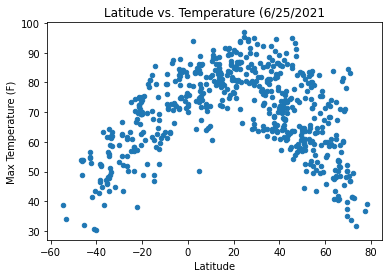

In [31]:
lat_vs_temp = city_stat_pd.plot.scatter(x="Latitude", y="Max Temperature")
plt.title('Latitude vs. Temperature (6/25/2021')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

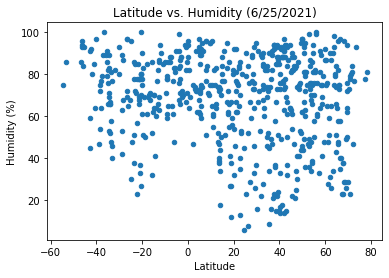

In [32]:
lat_vs_humid = city_stat_pd.plot.scatter(x ='Latitude', y ='Humidity')
plt.title('Latitude vs. Humidity (6/25/2021)')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/LatvsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

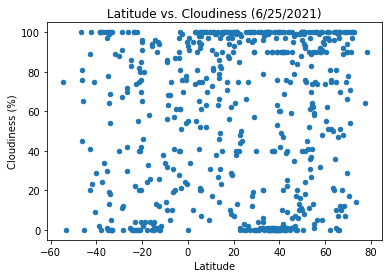

In [33]:
lat_vs_cloud = city_stat_pd.plot.scatter(x='Latitude', y ='Clouds')
plt.title('Latitude vs. Cloudiness (6/25/2021)')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

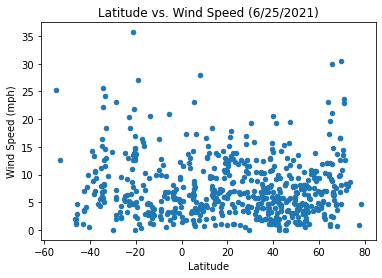

In [34]:
lat_vs_wind = city_stat_pd.plot.scatter(x = 'Latitude', y ='Wind')
plt.title('Latitude vs. Wind Speed (6/25/2021)')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/LatvsWind.png")
plt.show()

## Linear Regression

In [21]:
north_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]>= 0)]
south_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]< 0)]

In [22]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=18,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3846358588632889


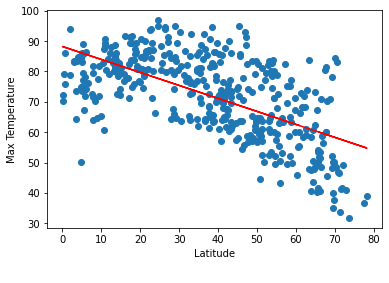

In [23]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5912305541673288


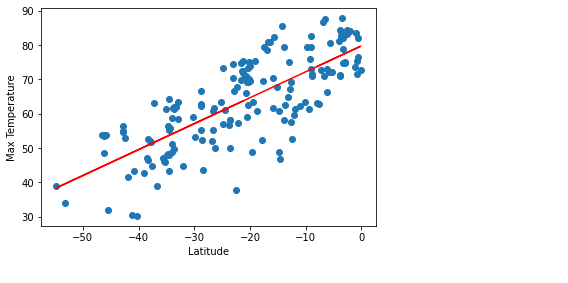

In [24]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0037396789654902335


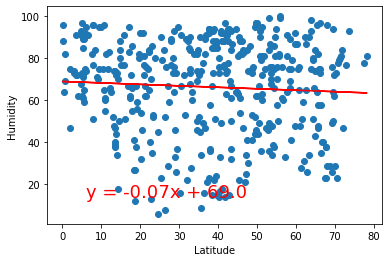

In [25]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006002869386806937


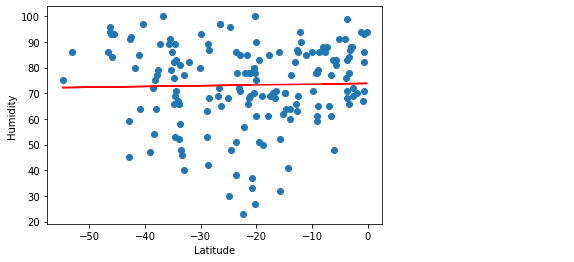

In [26]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002036420494695259


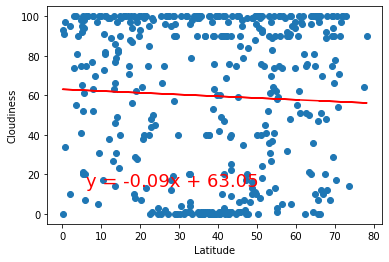

In [27]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.000320130895617425


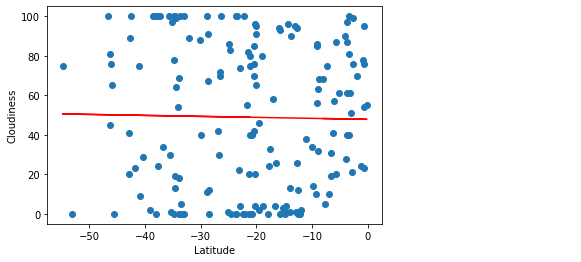

In [28]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0007793589714643098


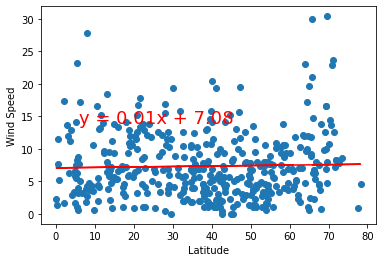

In [29]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.022072022958931684


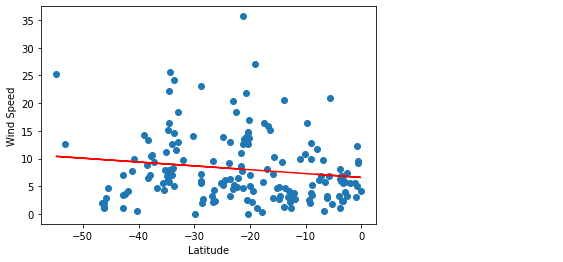

In [30]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()
